In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
data = pd.read_csv("/data/vaccination_all_tweets.csv")
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
data2_pos = pd.read_csv("/data/tweets_postive.csv")
data2_pos.head()

,date,likes,retweets,text,verified,Sentiment Label
0,2021-05-15 02:24:48,0.0,0.0,AYO I got my vaccine today :) shot 1/2 💉\nLets...,0.0,1
1,2021-05-15 02:24:27,0.0,0.0,i’m getting my covid shot tomorrow !! i’m supe...,0.0,1
2,2021-05-15 02:24:11,0.0,0.0,"@buffalo_butt Vaccine porn, that sounds like n...",0.0,1
3,2021-05-15 02:23:26,0.0,0.0,@legasimmer Getting Pfizer tomorrow! :),0.0,1
4,2021-05-15 02:17:10,1.0,0.0,@vnzndt i worked on my english essay and got m...,0.0,1


In [ ]:
data3_neg = pd.read_csv("/data/tweets_negative.csv")
data3_neg.head()

,date,likes,retweets,text,verified,Sentiment Label
0,2021-05-15 03:24:09,0.0,0.0,Fml. My brother has tested positive for covid ...,0.0,0
1,2021-05-15 03:20:22,0.0,0.0,"@heyhandsomewill lol covid dolls, they wont ki...",0.0,0
2,2021-05-15 03:20:00,0.0,0.0,I wonder how many face masks have ended up in ...,0.0,0
3,2021-05-15 03:16:19,0.0,0.0,@CDCgov @POTUS @VP my family members in the US...,0.0,0
4,2021-05-15 03:03:18,0.0,0.0,It's not that we don't feel terrible when some...,0.0,0


## Limpieza de tweets generales

In [ ]:
data.text = data.text.str.lower()
data.text = data.text.apply(lambda x:re.sub('@[^\s]+','',x)) #Remove twitter handlers
data.text = data.text.apply(lambda x:re.sub(r'\B#\S+','',x)) #Remove hashtags
data.text = data.text.apply(lambda x:re.sub(r"http\S+", "", x)) # Remove URLS
data.text = data.text.apply(lambda x:' '.join(re.findall(r'\w+', x))) # Remove all the special characters
data.text = data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x)) #remove all single characters
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I)) # Substituting multiple spaces with single space

In [ ]:
data['Sentiment']=data['text'].apply(lambda x: SIA().polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))

In [ ]:
def label_p(x):
  prob = [x['pos'],x['neu'],x['neg']]
  p = 0
  if (x['pos']==0) and (x['neg']==0) and (x['neu']==0):
    p = np.nan
  elif (x['pos']>=x['neu']) and (x['pos']>=x['neg']):
    p = 1
  else:
    p = 0
  return p

def label_n(x):
  prob = [x['pos'],x['neu'],x['neg']]
  p = 0
  if (x['pos']==0) and (x['neg']==0) and (x['neu']==0):
    p = np.nan
  elif (x['neu']>=x['pos']) and (x['neu']>=x['neg']):
    p = 1
  else:
    p = 0
  return p

def label_ne(x):
  prob = [x['pos'],x['neu'],x['neg']]
  p = 0
  if (x['pos']==0) and (x['neg']==0) and (x['neu']==0):
    p = np.nan
  elif (x['neg']>=x['pos']) and (x['neg']>=x['neu']):
    p = 1
  else:
    p = 0
  return p

In [ ]:
data['Positive Sentiment'] = data['Sentiment'].apply(lambda x: label_p(x)) 
data['Neutral Sentiment'] = data['Sentiment'].apply(lambda x: label_n(x))
data['Negative Sentiment'] = data['Sentiment'].apply(lambda x: label_ne(x))

In [ ]:
data = data[data['Neutral Sentiment'].notna()]
data

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat cytok...,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.0,1.0,0.0
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...",0.0,1.0,0.0
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,russian vaccine is created to last 2 4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.0,1.0,0.0
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts are immutable senator even when you re n...,NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain to me again why we need vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46053,1376084087312637963,Douglas Herbert,Paris,Paris-based commentator at @France24. Also an ...,2009-02-27 17:18:30,9265,2413,1529,True,2021-03-28 08:09:47,universal access some shopping malls in the ur...,"['Yekaterinburg', 'SputnikV']",Twitter for iPhone,0,6,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0
46054,1376080077054746624,Consumer Grassroots,Kenya,Official Account for Consumer Grassroots Assoc...,2016-11-30 08:14:19,23021,447,19882,True,2021-03-28 07:53:51,russian covid 19 vaccine now in kenya on 25th ...,['SputnikV'],Twitter Web App,1,2,False,"{'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'comp...",0.0,1.0,0.0
46055,1376073682381107201,Michael Muchiri,Nairobi,Civil Engineer working in Kenya. With a Passio...,2011-01-31 17:39:38,1595,3515,6795,False,2021-03-28 07:28:26,communique on covid19 lockdown effects on usiu...,NaN,Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0
46056,1376068500360470529,Michael Muchiri,Nairobi,Civil Engineer working in Kenya. With a Passio...,2011-01-31 17:39:38,1595,3515,6795,False,2021-03-28 07:07:51,mask is worn on the face for protection disgui...,NaN,Twitter for Android,0,0,False,"{'neg': 0.21, 'neu': 0.65, 'pos': 0.14, 'compo...",0.0,1.0,0.0


In [ ]:
data_neutro = data[data['Neutral Sentiment']==1][0:3500]
data_neutro

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat cytok...,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.0,1.0,0.0
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...",0.0,1.0,0.0
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,russian vaccine is created to last 2 4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.0,1.0,0.0
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts are immutable senator even when you re n...,NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain to me again why we need vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,1350120969231327232,Concerned Citizen,"Missouri, USA",My name is Kea. Wear a mask. Don’t be a sediti...,2018-10-27 20:21:48,1175,1560,6287,False,2021-01-15 16:41:37,there are 6 1 million plus as of yesterday rou...,['Missourians'],Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0
3661,1350117777735110656,Simon Sprott,Austria,Work fast | Have fun | #StaySafe | Never give ...,2011-05-03 14:57:11,1905,1840,1945,False,2021-01-15 16:28:56,i know am hard to kill but if the is ok for me...,"['PfizerBioNTech', 'vaccine', 'allergies']",Twitter for iPhone,0,0,False,"{'neg': 0.185, 'neu': 0.686, 'pos': 0.128, 'co...",0.0,1.0,0.0
3662,1350115480124551169,Mark 😷🎧🎶🔴⚪️💙,Melbourne 💜 AUSTRALIA,holding the Abbott/Turnbull/Morrison Govt acco...,2011-06-04 14:08:21,4356,1452,7650,False,2021-01-15 16:19:49,i less enthusiastic about the jab pattern is e...,['PfizerBioNTech'],Twitter for iPhone,0,0,False,"{'neg': 0.144, 'neu': 0.689, 'pos': 0.167, 'co...",0.0,1.0,0.0
3663,1350113900965089283,Arezki Daoud,Global,Publisher/Editor of The North Africa Journal,2013-02-16 00:19:56,305,52,87,False,2021-01-15 16:13:32,anticipates the rollout of the vaccine details...,"['Covid19', 'Nigeria', 'PfizerBioNTech']",TweetDeck,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0


In [ ]:
data_positive = data[data['Positive Sentiment']==1]
data_positive

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
11,1337840331522453507,VoiceM,NaN,campaigner & optimistic realist,2020-08-31 10:38:21,2,25,20,False,2020-12-12 19:22:45,best wishes to the us,"['COVID19', 'CovidVaccine', 'vaccine', 'Corona...",Twitter Web App,0,0,False,"{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'comp...",1.0,0.0,0.0
125,1338476299216695296,عماد الصالح,Al Khobar,‏‏في عيوني ريح توت وزعفران، وبجنوب القلب يملان...,2012-01-28 10:34:55,171,574,1091,False,2020-12-14 13:29:52,well done usa,"['PfizerBioNTech', 'Pfizervaccine', 'COVID19']",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",1.0,0.0,0.0
142,1338446777767374855,Digital Journal,Global,A global digital media and news network. Onlin...,2008-06-16 16:10:04,18756,8809,24697,False,2020-12-14 11:32:33,approves,"['Singapore', 'PfizerBioNTech', 'VirusVaccine'...",Twitter Web App,0,1,False,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",1.0,0.0,0.0
143,1338443641027776515,Anita Raja,Birmingham UK,Doctor@NHS🏴󠁧󠁢󠁥󠁮󠁧󠁿MRCGP@RCGP Ex-TV presenter@pt...,2013-11-30 01:40:09,67,188,13,False,2020-12-14 11:20:05,excited about tomorrow so honoured to be part ...,['Covid_19'],Twitter for iPhone,0,3,False,"{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'comp...",1.0,0.0,0.0
180,1338304176691040257,El Portal Tv Miami,"Palm Beach, FL",Todos pasan por Miami y yo me entero Casada co...,2018-11-07 23:35:48,332,891,15450,False,2020-12-14 02:05:54,be safe and thank you,"['vaccine', 'FedEx', 'PfizerBioNTech', 'Pfizer']",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp...",1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45655,1377006118317268993,Jape Puntila,why ask?,"Politiikan seuraaja, yleisten asioiden päivitt...",2017-08-22 15:11:30,264,508,25704,False,2021-03-30 21:13:36,from with love,"['SputnikV', 'Russia']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",1.0,0.0,0.0
45771,1376906298156023818,Dagetariwawatu,NaN,I became a doctor to treat the ones who no one...,2021-03-24 09:30:24,23,28,469,False,2021-03-30 14:36:57,it mandatory,NaN,Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",1.0,0.0,0.0
45820,1376848736324833286,Nicola Facciolini,L'Aquila,Science Journalist,2009-05-16 08:28:23,652,1725,83907,False,2021-03-30 10:48:14,in we trust,"['SputnikV', 'EpiVacCorona', 'KoviVac']",Twitter for Android,1,1,False,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",1.0,0.0,0.0
45856,1376744059243425799,Anil Tiwari,Lucknow INDIA,Founder & CEO @WeUttarPradesh #Digital #G33K \...,2013-08-03 09:15:30,72131,282,16240,False,2021-03-30 03:52:17,india eagerly awaits vaccine,['SputnikV'],Twitter for Android,2,17,False,"{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'comp...",1.0,0.0,0.0


In [ ]:
data_negative = data[data['Negative Sentiment']>0]
data_negative

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
50,1339227682094059520,Love Truth Faith ❤️,NaN,Spiritual warrior. Love is my weapon. Truth is...,2017-11-09 23:25:52,220,1143,2386,False,2020-12-16 15:15:35,tragedy another life taken by corporate greed ...,"['vaccination', 'vaccine']",Twitter Web App,0,0,False,"{'neg': 0.561, 'neu': 0.439, 'pos': 0.0, 'comp...",0.0,0.0,1.0
62,1338596870634041349,Trudeau Kabuki 🎭 🐵 🤡 ☻,Moronto City Of #Morons Canada,Anti-Trudeau #FireTrudeau #TraitorTrudeau\n#Tr...,2018-01-15 22:24:45,1070,1191,50770,False,2020-12-14 21:28:58,female sterilization untested no liabilities,"['PfizerBioNTech', 'Pfizer', 'CrimesAgainstHum...",Twitter Web App,0,0,False,"{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'comp...",0.0,0.0,1.0
369,1338910249886081026,Jess Griffin,NaN,“It is no measure of health to be well adjuste...,2013-05-15 14:55:19,4773,5244,73701,False,2020-12-15 18:14:13,you can stick your poison vaccine up your ass,"['NoVaccineForMe', 'VaccineGenocide2020', 'Pfi...",Twitter for iPhone,1,3,False,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...",0.0,1.0,1.0
464,1338664365592113157,Trudeau Kabuki 🎭 🐵 🤡 ☻,Moronto City Of #Morons Canada,Anti-Trudeau #FireTrudeau #TraitorTrudeau\n#Tr...,2018-01-15 22:24:45,1073,1194,50808,False,2020-12-15 01:57:10,no liabilities untested,"['PfizerBioNTech', 'Pfizervaccine', 'Pfizer', ...",Twitter Web App,0,0,False,"{'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound...",0.0,0.0,1.0
494,1339364513297133573,Emi Mei,NaN,"Roman, #wine #food #journalist #sommelier #mai...",2008-12-27 02:52:58,4539,4954,47453,False,2020-12-17 00:19:18,don do the effin,"['vaccine', 'PfizerBioNTech', 'Pfizer', 'Covid...",Twitter for iPhone,0,0,False,"{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...",0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45078,1377929092671082497,Feomi,NaN,Stream Girl Twitch (Feomi),2021-03-31 09:38:23,2,3,9,False,2021-04-02 10:21:11,bitcoin covid_19 doom,"['꽃보라해', 'xrp', 'ArtistOnTwitter', 'blockchain...",Twitter for iPhone,0,1,False,"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...",0.0,0.0,1.0
45130,1377744871478333445,Mahendran S,NaN,NaN,2017-09-09 20:36:49,22,0,1032,False,2021-04-01 22:09:09,disappointing fails to get restricted use author,['SputnikV'],Twitter for iPad,0,0,False,"{'neg': 0.683, 'neu': 0.317, 'pos': 0.0, 'comp...",0.0,0.0,1.0
45313,1377387999785222144,Genisys Motale,"Kroonstad, South Africa",NaN,2017-06-03 10:46:41,743,1329,2621,False,2021-03-31 22:31:04,could use some killer saxophone,"['mohale', 'SputnikV', 'wednesdaythought']",Twitter for Android,0,0,False,"{'neg': 0.518, 'neu': 0.482, 'pos': 0.0, 'comp...",0.0,0.0,1.0
45331,1377355091909386242,grünesKrokodil,"München, Innsbruck",watching the universe,2011-01-16 19:20:07,2075,4994,10468,False,2021-03-31 20:20:18,freaks,['SputnikV'],Twitter Web App,0,0,False,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0


- Neutral = 3500
- Negativo = 291
- Positivo = 1138

In [ ]:
part1 = pd.concat([data_neutro,data_positive,data_negative])
part1 = part1[['text','Positive Sentiment','Neutral Sentiment','Negative Sentiment']]
part1

,text,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,same folks said daikon paste could treat cytok...,0.0,1.0,0.0
1,while the world has been on the wrong side of ...,0.0,1.0,0.0
2,russian vaccine is created to last 2 4 years,0.0,1.0,0.0
3,facts are immutable senator even when you re n...,0.0,1.0,0.0
4,explain to me again why we need vaccine,0.0,1.0,0.0
...,...,...,...,...
45078,bitcoin covid_19 doom,0.0,0.0,1.0
45130,disappointing fails to get restricted use author,0.0,0.0,1.0
45313,could use some killer saxophone,0.0,0.0,1.0
45331,freaks,0.0,0.0,1.0


## Limpieza de tweets positivos

In [ ]:
data2_pos.text = data2_pos.text.str.lower()
data2_pos.text = data2_pos.text.apply(lambda x:re.sub('@[^\s]+','',x)) #Remove twitter handlers
data2_pos.text = data2_pos.text.apply(lambda x:re.sub(r'\B#\S+','',x)) #Remove hashtags
data2_pos.text = data2_pos.text.apply(lambda x:re.sub(r"http\S+", "", x)) # Remove URLS
data2_pos.text = data2_pos.text.apply(lambda x:' '.join(re.findall(r'\w+', x))) # Remove all the special characters
data2_pos.text = data2_pos.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x)) #remove all single characters
data2_pos.text = data2_pos.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I)) # Substituting multiple spaces with single space

In [ ]:
data2_pos['Positive Sentiment'] = 1
data2_pos['Neutral Sentiment'] = 0
data2_pos['Negative Sentiment'] = 0
data2_pos = data2_pos.drop(columns=['Sentiment Label'])
data2_pos

,date,likes,retweets,text,verified,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,2021-05-15 02:24:48,0.0,0.0,ayo got my vaccine today shot 1 2 lets go pfiz...,0.0,1,0,0
1,2021-05-15 02:24:27,0.0,0.0,i getting my covid shot tomorrow m super excit...,0.0,1,0,0
2,2021-05-15 02:24:11,0.0,0.0,vaccine porn that sounds like nude pinup shots...,0.0,1,0,0
3,2021-05-15 02:23:26,0.0,0.0,getting pfizer tomorrow,0.0,1,0,0
4,2021-05-15 02:17:10,1.0,0.0,i worked on my english essay and got my first ...,0.0,1,0,0
...,...,...,...,...,...,...,...,...
4995,2021-05-09 16:49:13,0.0,0.0,hey kanchana fair point private hospital costs...,0.0,1,0,0
4996,2021-05-09 16:44:43,8.0,0.0,hey everyone there will be no stream this even...,0.0,1,0,0
4997,2021-05-09 16:41:58,0.0,0.0,that why we need to get the vaccine proof whet...,0.0,1,0,0
4998,2021-05-09 16:39:52,6.0,0.0,gm fever went down to 99 9 goin to get covid t...,0.0,1,0,0


In [ ]:
parte2 = data2_pos[0:2500]
parte2 = parte2[['text','Positive Sentiment','Neutral Sentiment','Negative Sentiment']]
parte2

,text,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,ayo got my vaccine today shot 1 2 lets go pfiz...,1,0,0
1,i getting my covid shot tomorrow m super excit...,1,0,0
2,vaccine porn that sounds like nude pinup shots...,1,0,0
3,getting pfizer tomorrow,1,0,0
4,i worked on my english essay and got my first ...,1,0,0
...,...,...,...,...
2495,guys the ages of 12 15 were just accepted to g...,1,0,0
2496,i can tell if m tired because of getting the v...,1,0,0
2497,the covid vaccine has been tested angel,1,0,0
2498,first vaccine dose done d,1,0,0


- Neutral: 3500
- Negativo: 291
- Positivo: 3638

## limpieza de tweets negativos

In [ ]:
data3_neg.text = data3_neg.text.str.lower()
data3_neg.text = data3_neg.text.apply(lambda x:re.sub('@[^\s]+','',x)) #Remove twitter handlers
data3_neg.text = data3_neg.text.apply(lambda x:re.sub(r'\B#\S+','',x)) #Remove hashtags
data3_neg.text = data3_neg.text.apply(lambda x:re.sub(r"http\S+", "", x)) # Remove URLS
data3_neg.text = data3_neg.text.apply(lambda x:' '.join(re.findall(r'\w+', x))) # Remove all the special characters
data3_neg.text = data3_neg.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x)) #remove all single characters
data3_neg.text = data3_neg.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I)) # Substituting multiple spaces with single space

In [ ]:
data3_neg['Positive Sentiment'] = 0
data3_neg['Neutral Sentiment'] = 0
data3_neg['Negative Sentiment'] = 1
data3_neg = data3_neg.drop(columns=['Sentiment Label'])
data3_neg

,date,likes,retweets,text,verified,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,2021-05-15 03:24:09,0.0,0.0,fml my brother has tested positive for covid g...,0.0,0,0,1
1,2021-05-15 03:20:22,0.0,0.0,lol covid dolls they wont kiss back tho,0.0,0,0,1
2,2021-05-15 03:20:00,0.0,0.0,i wonder how many face masks have ended up in ...,0.0,0,0,1
3,2021-05-15 03:16:19,0.0,0.0,my family members in the us are frontline heal...,0.0,0,0,1
4,2021-05-15 03:03:18,0.0,0.0,it not that we don feel terrible when someone ...,0.0,0,0,1
...,...,...,...,...,...,...,...,...
3233,2021-05-07 12:42:06,1.0,0.0,and there is no vaccine for this epidemic either,1.0,0,0,1
3234,2021-05-07 12:36:52,0.0,0.0,really covid is soo cruel hope everyone who re...,0.0,0,0,1
3235,2021-05-07 12:33:45,0.0,0.0,this is pretty normal for vivint sales the sal...,0.0,0,0,1
3236,2021-05-07 12:32:49,0.0,0.0,0 future bc did bad 1 year in high school oh n...,0.0,0,0,1


In [ ]:
parte3 = data3_neg[['text','Positive Sentiment','Neutral Sentiment','Negative Sentiment']]
parte3

,text,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,fml my brother has tested positive for covid g...,0,0,1
1,lol covid dolls they wont kiss back tho,0,0,1
2,i wonder how many face masks have ended up in ...,0,0,1
3,my family members in the us are frontline heal...,0,0,1
4,it not that we don feel terrible when someone ...,0,0,1
...,...,...,...,...
3233,and there is no vaccine for this epidemic either,0,0,1
3234,really covid is soo cruel hope everyone who re...,0,0,1
3235,this is pretty normal for vivint sales the sal...,0,0,1
3236,0 future bc did bad 1 year in high school oh n...,0,0,1


- Neutral: 3500
- Negativo: 3529
- Positivo: 3638

### Unimos los dataset y los preparamos para el modelo

In [ ]:
all_data = pd.concat([part1,parte2,parte3])
all_data = all_data.reset_index(drop=True)
all_data

,text,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,same folks said daikon paste could treat cytok...,0.0,1.0,0.0
1,while the world has been on the wrong side of ...,0.0,1.0,0.0
2,russian vaccine is created to last 2 4 years,0.0,1.0,0.0
3,facts are immutable senator even when you re n...,0.0,1.0,0.0
4,explain to me again why we need vaccine,0.0,1.0,0.0
...,...,...,...,...
10662,and there is no vaccine for this epidemic either,0.0,0.0,1.0
10663,really covid is soo cruel hope everyone who re...,0.0,0.0,1.0
10664,this is pretty normal for vivint sales the sal...,0.0,0.0,1.0
10665,0 future bc did bad 1 year in high school oh n...,0.0,0.0,1.0


In [ ]:
X = all_data['text'].to_list()
Y = np.array(all_data[['Positive Sentiment','Neutral Sentiment','Negative Sentiment']])

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import keras 
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils

embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")
embeddings = embed(["cat"])
embeddings

<tf.Tensor: shape=(1, 250), dtype=float32, numpy=
array([[-9.02263522e-02, -5.92681654e-02,  9.36282724e-02,
         1.22781163e-02, -4.29381430e-03,  2.91167088e-02,
        -2.67234147e-02, -1.78336993e-01,  6.32100925e-02,
        -4.36324514e-02,  3.80062461e-02,  5.93412928e-02,
         1.78387742e-02,  5.80865853e-02,  3.80070582e-02,
         6.35408312e-02,  5.59702180e-02, -2.82338485e-02,
         5.86770251e-02, -8.04539248e-02,  8.61731395e-02,
         4.20686789e-02, -6.38437718e-02, -4.56397757e-02,
        -8.26565316e-04, -2.74271257e-02, -4.85783890e-02,
        -3.02128657e-03,  1.96928717e-02,  7.50550330e-02,
        -3.38843018e-02, -4.86239232e-02,  3.60696353e-02,
        -1.49989696e-02,  5.38611338e-02, -5.84659204e-02,
         5.11402497e-03,  1.98326129e-02,  1.18531315e-02,
         7.35010579e-02, -3.52372900e-02, -1.40145600e-01,
        -7.74593577e-02, -2.47473326e-02,  7.75676221e-02,
         4.90232669e-02, -2.44710688e-02,  1.02667831e-01,
      

In [ ]:
# Some other functions
def get_max_length(df):
    """
    get max token counts from train data, 
    so we use this number as fixed length input to RNN cell
    """
    max_length = 0
    for row in df['text']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length

def get_word2vec_enc(reviews):
    """
    get word2vec value for each word in sentence.
    concatenate word in numpy array, so we can use it as RNN input
    """
    encoded_reviews = []
    for review in reviews:
        tokens = review.split(" ")
        word2vec_embedding = embed(tokens)
        #for num in word2vec_embedding:
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews
        
def get_padded_encoded_reviews(encoded_reviews,max_length):
    """
    for short sentences, we prepend zero padding so all input to RNN has same length
    """
    padded_reviews_encoding = []
    for enc_review in encoded_reviews:
        zero_padding_cnt = max_length - enc_review.shape[0]
        pad = np.zeros((1, 250))
        for i in range(zero_padding_cnt):
            enc_review = np.concatenate((pad, enc_review), axis=0)
        padded_reviews_encoding.append(enc_review)
    return padded_reviews_encoding

def x_preprocessin(lista,max_l):
  lista2 = lista
  lista2 = get_word2vec_enc(lista2)
  lista2 = get_padded_encoded_reviews(lista2,max_l)
  return lista2


In [ ]:
max_length = get_max_length(all_data)
max_length

31

In [ ]:
X = x_preprocessin(X,max_length)
X = np.array(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(32))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/50
267/267 [==============================] - 9s 23ms/step - loss: 1.0064 - accuracy: 0.4965 - val_loss: 0.9016 - val_accuracy: 0.5801
Epoch 2/50
267/267 [==============================] - 5s 20ms/step - loss: 0.8793 - accuracy: 0.5920 - val_loss: 0.8517 - val_accuracy: 0.6265
Epoch 3/50
267/267 [==============================] - 6s 21ms/step - loss: 0.8208 - accuracy: 0.6258 - val_loss: 0.8112 - val_accuracy: 0.6410
Epoch 4/50
267/267 [==============================] - 6s 21ms/step - loss: 0.8031 - accuracy: 0.6336 - val_loss: 0.7953 - val_accuracy: 0.6453
Epoch 5/50
267/267 [==============================] - 5s 21ms/step - loss: 0.7856 - accuracy: 0.6492 - val_loss: 0.7838 - val_accuracy: 0.6439
Epoch 6/50
267/267 [==============================] - 6s 21ms/step - loss: 0.7600 - accuracy: 0.6676 - val_loss: 0.7946 - val_accuracy: 0.6523
Epoch 7/50
267/267 [==============================] - 5s 20ms/step - loss: 0.7448 - accuracy: 0.6740 - val_loss: 0.7622 - val_accuracy: 0.6720

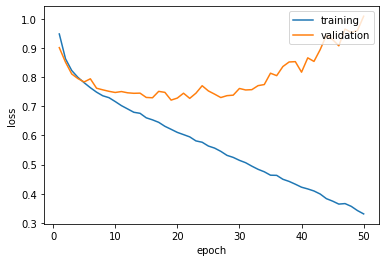

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,50+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
fig = plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()